In [37]:
import requests
import pandas as pd


url = "https://contratos.comprasnet.gov.br/api/contrato/ug/113601"
response = requests.get(url)

data = response.json()
df = pd.DataFrame(data)


df.head(5)

,id,receita_despesa,numero,contratante,fornecedor,codigo_tipo,tipo,subtipo,prorrogavel,situacao,...,data_publicacao,data_proposta_comercial,vigencia_inicio,vigencia_fim,valor_inicial,valor_global,num_parcelas,valor_parcela,valor_acumulado,links
0,2443,Despesa,00006/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '00.0...",50,Contrato,None,None,Ativo,...,2019-02-04,None,2019-02-04,2025-02-04,"0,01","0,01",1,"0,01","0,61",{'historico': 'https://contratos.comprasnet.go...
1,2447,Despesa,00020/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '69.1...",50,Contrato,None,Sim,Ativo,...,2021-02-18,None,2019-09-12,2024-09-12,"13.994,28","16.734,14",12,"1.394,51","75.404,49",{'historico': 'https://contratos.comprasnet.go...
2,2457,Despesa,00026/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '03.1...",50,Contrato,None,None,Ativo,...,2019-12-18,None,2019-12-16,2024-12-16,"2.055.393,36","2.726.804,99",12,"227.233,75","12.134.728,30",{'historico': 'https://contratos.comprasnet.go...
3,2776,Despesa,00023/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '18.0...",50,Contrato,None,Sim,Ativo,...,2019-11-08,None,2019-11-05,2025-05-05,"83.863,32","68.670,66",12,"5.722,56","577.028,22",{'historico': 'https://contratos.comprasnet.go...
4,4260,Despesa,00027/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '00.6...",50,Contrato,None,Não,Ativo,...,2019-12-24,None,2020-04-27,2025-04-27,"512.000,00","0,00",1,"0,00","0,00",{'historico': 'https://contratos.comprasnet.go...


Média: 1068868.53
Desvio padrão: 3476791.29
Mediana: 7401.31


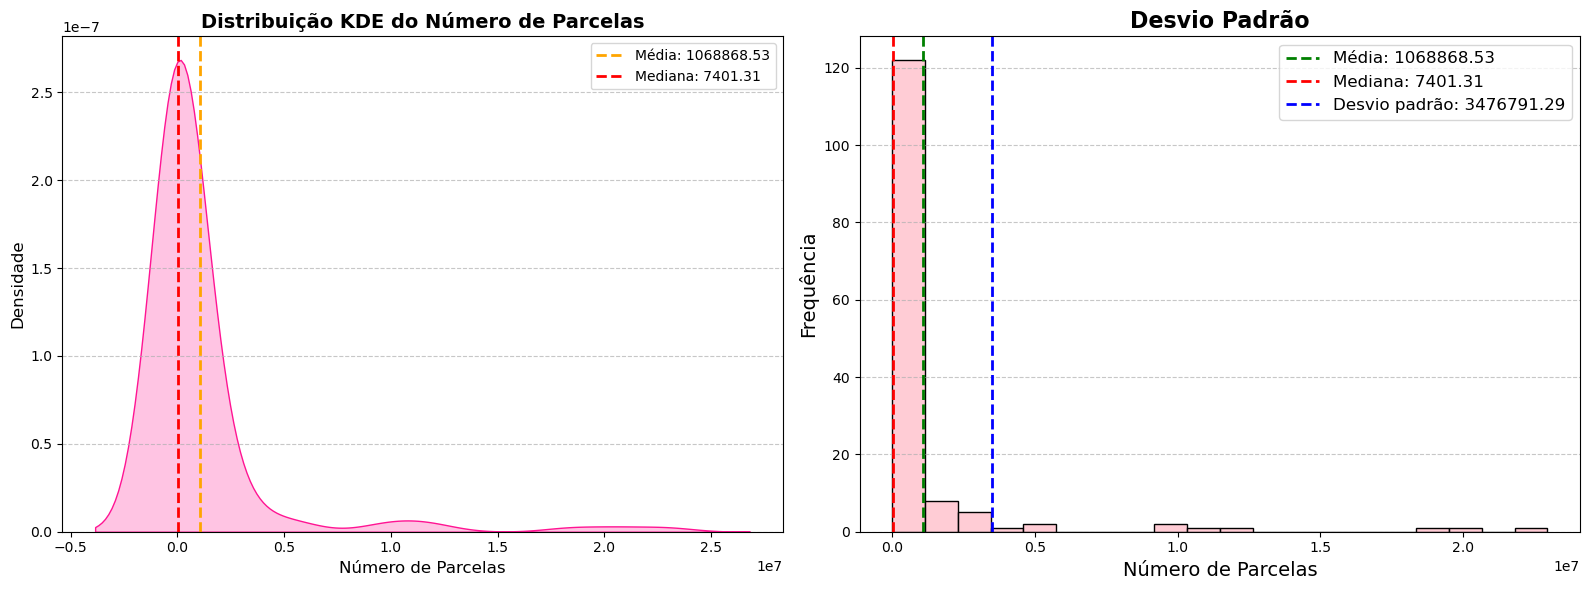

In [38]:
# Análise Quantitativa- pt1- num_parcelas

import matplotlib.pyplot as plt
import seaborn as sns

# Limpeza dos dados

if 'valor_acumulado' in df.columns: 
    df['valor_acumulado'] = df['valor_acumulado'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df['valor_acumulado'] = pd.to_numeric(df['valor_acumulado'], errors='coerce')
    coluna_valor = df['valor_acumulado'].dropna()  # Remover valores nulos
else:
    print("A coluna não existe.")

# Cálculo da média, desvio padrão e mediana
media = round(coluna_valor.mean(), 2)
desvio_padrao = round(coluna_valor.std(), 2)
mediana = round(coluna_valor.median(), 2)
print(f"Média: {media:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")
print(f"Mediana: {mediana:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

# KDE Plot
sns.kdeplot(coluna_valor, color='deeppink', fill=True, ax=axes[0])
axes[0].axvline(media, color='orange', linestyle='--', linewidth=2, label=f'Média: {media:.2f}')
axes[0].axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')  # Linha para a mediana
axes[0].set_title('Distribuição KDE do Número de Parcelas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Parcelas', fontsize=12)
axes[0].set_ylabel('Densidade', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(fontsize=10, loc='upper right')


# Gráfico de Barras

sns.histplot(coluna_valor, bins=20, kde=False, color='pink', alpha=0.8)
axes[1].axvline(media, color='green', linestyle='--', linewidth=2, label=f'Média: {media:.2f}')
axes[1].axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
axes[1].axvline(desvio_padrao, color='blue', linestyle='--', linewidth=2, label=f'Desvio padrão: {desvio_padrao:.2f}')
axes[1].set_title('Desvio Padrão', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Número de Parcelas', fontsize=14)
axes[1].set_ylabel('Frequência', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


Mediana: 174342.00


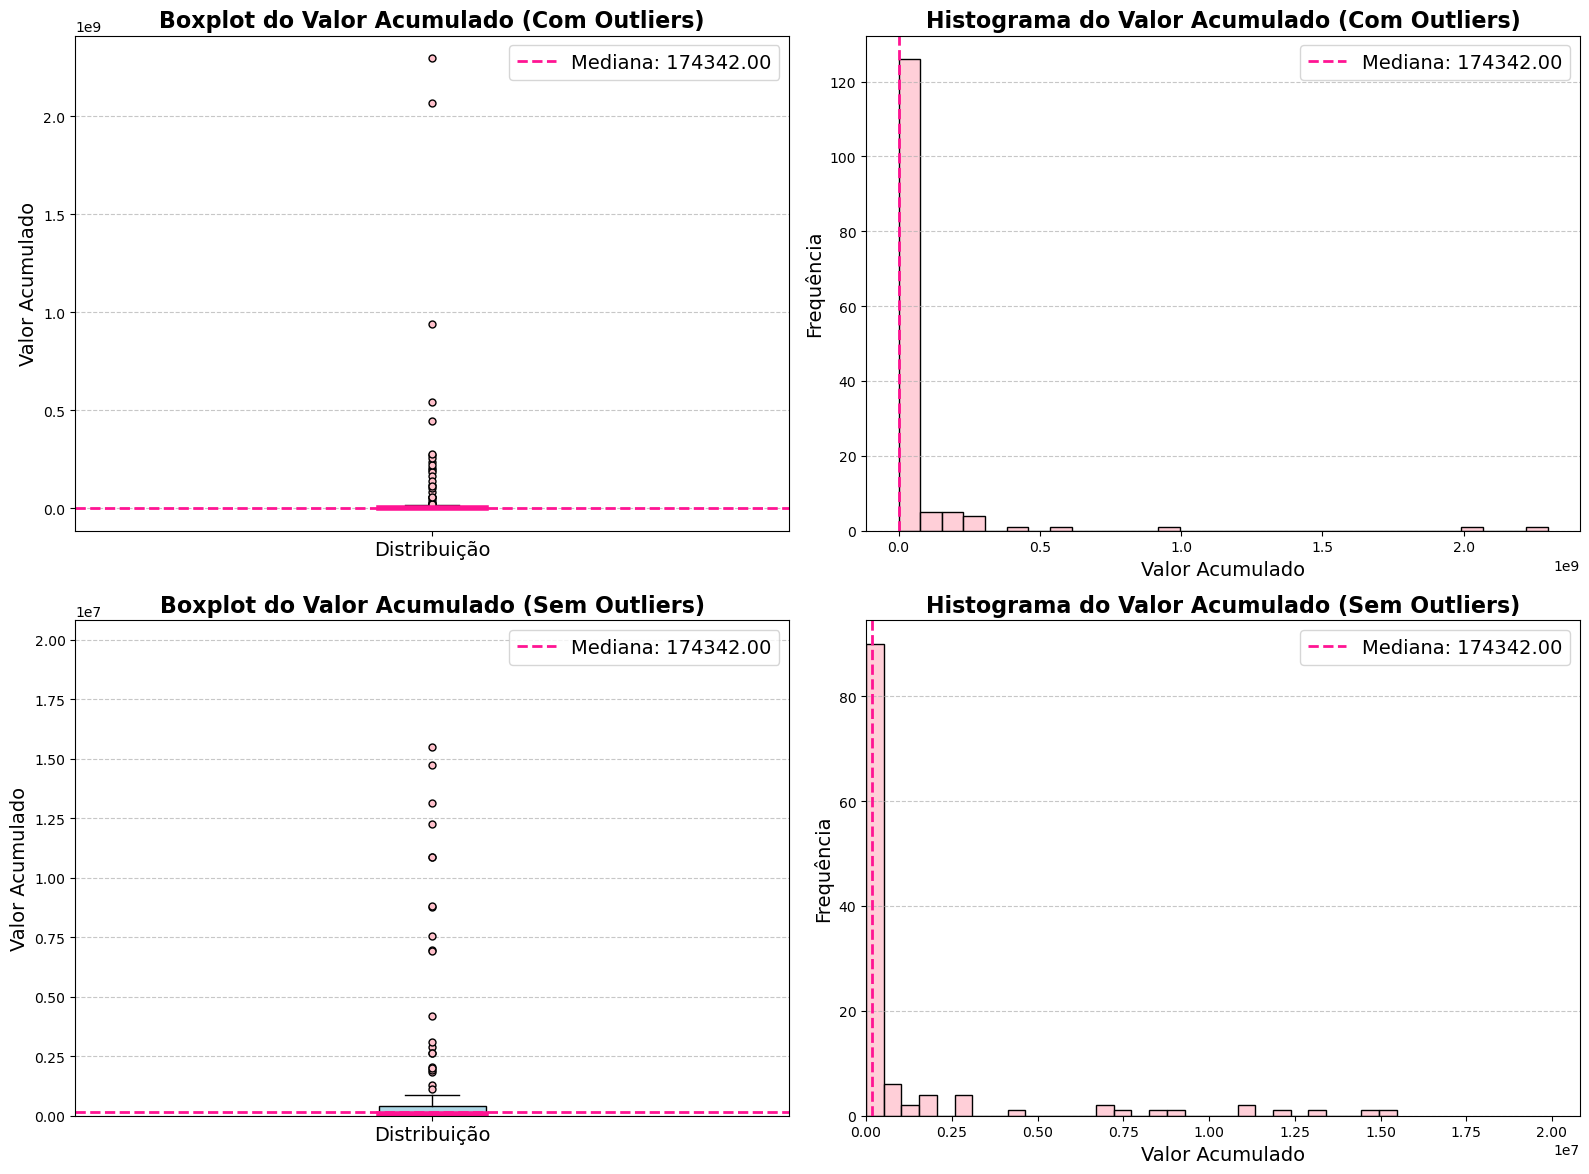

In [70]:
# Análise Quantitativa- pt1- valor_acumulado

import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que a coluna 'valor_acumulado' existe e limpar os dados
if 'valor_acumulado' in df.columns: 
    coluna_valor = df['valor_acumulado'].astype(str).str.replace(',', '.', regex=False)
    coluna_valor = pd.to_numeric(coluna_valor, errors='coerce').dropna()
else:
    print("A coluna 'valor_acumulado' não existe no DataFrame.")
    coluna_valor = pd.Series(dtype=float)
if not coluna_valor.empty:
    # Cálculo da mediana
    mediana = round(coluna_valor.median(), 2)
    print(f"Mediana: {mediana:.2f}")

    # Identificar outliers
    q1 = coluna_valor.quantile(0.25)
    q3 = coluna_valor.quantile(0.75)
    limite_inferior = q1 - 1.5 * (q3 - q1)
    limite_superior = q3 + 1.5 * (q3 - q1)
    dados_filtrados = coluna_valor[(coluna_valor >= limite_inferior) & (coluna_valor <= limite_superior)]

 
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  

    # Boxplot com outliers
    axes[0, 0].boxplot(
        coluna_valor,
        patch_artist=True, 
        boxprops=dict(facecolor='lightblue'), 
        medianprops=dict(color='deeppink', linewidth=4),  
        whiskerprops=dict(color='black'),  
        flierprops=dict(markerfacecolor='pink', marker='o', markersize=5)
    )
    axes[0, 0].set_title('Boxplot do Valor Acumulado (Com Outliers)', fontsize=16, fontweight='bold')
    axes[0, 0].set_ylabel('Valor Acumulado', fontsize=14)
    axes[0, 0].set_xticks([1])
    axes[0, 0].set_xticklabels(['Distribuição'], fontsize=14)
    axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0, 0].axhline(mediana, color='deeppink', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    axes[0, 0].legend(fontsize=14, loc='upper right')

    # Histograma com outliers
    sns.histplot(coluna_valor, bins=30, kde=False, color='pink', ax=axes[0, 1])
    axes[0, 1].set_title('Histograma do Valor Acumulado (Com Outliers)', fontsize=16, fontweight='bold')
    axes[0, 1].set_xlabel('Valor Acumulado', fontsize=14)
    axes[0, 1].set_ylabel('Frequência', fontsize=14)
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0, 1].axvline(mediana, color='deeppink', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    axes[0, 1].legend(fontsize=14, loc='upper right')

    # Boxplot sem outliers
    axes[1, 0].boxplot(
        dados_filtrados,
        patch_artist=True, 
        boxprops=dict(facecolor='lightblue'), 
        medianprops=dict(color='deeppink', linewidth=4),  
        whiskerprops=dict(color='black'),  
        flierprops=dict(markerfacecolor='pink', marker='o', markersize=5)
    )
    axes[1, 0].set_title('Boxplot do Valor Acumulado (Sem Outliers)', fontsize=16, fontweight='bold')
    axes[1, 0].set_ylabel('Valor Acumulado', fontsize=14)
    axes[1, 0].set_xticks([1])
    axes[1, 0].set_xticklabels(['Distribuição'], fontsize=14)
    axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1, 0].axhline(mediana, color='deeppink', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    axes[1, 0].legend(fontsize=14, loc='upper right')
    axes[1, 0].set_ylim([0, limite_superior * 1.2]) 

    # Histograma sem outliers
    sns.histplot(dados_filtrados, bins=30, kde=False, color='pink', ax=axes[1, 1])
    axes[1, 1].set_title('Histograma do Valor Acumulado (Sem Outliers)', fontsize=16, fontweight='bold')
    axes[1, 1].set_xlabel('Valor Acumulado', fontsize=14)
    axes[1, 1].set_ylabel('Frequência', fontsize=14)
    axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1, 1].axvline(mediana, color='deeppink', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    axes[1, 1].legend(fontsize=14, loc='upper right')
    axes[1, 1].set_xlim([0, limite_superior * 1.2])  


    plt.tight_layout()  
    plt.show()
else:
    print("Não há dados válidos para análise na coluna 'valor_acumulado'.")





In [85]:
# Análise Qualitativa


# Verificar se tem valores nulos e quantos

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Colunas com valores nulos:  quantos nulos")
print(missing_values)
print("\n")


# Verificar se os dados estão nos formatos corretos

print("Tipos de dados:")
print(df.dtypes)
print("\n")


# Verificar se tem valores duplicados

df = df.applymap(lambda x: str(x) if isinstance(x, dict) else x)
duplicated_rows = df[df.duplicated()]  
print(f"Linhas duplicadas: {len(duplicated_rows)}\n")
print("\n")


# Verificar os dados outliners, no valor_acumulado

if 'valor_acumulado' in df.columns:
    q1 = df['valor_acumulado'].quantile(0.25)
    q3 = df['valor_acumulado'].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = df[(df['valor_acumulado'] < limite_inferior) | (df['valor_acumulado'] > limite_superior)]
    print(f"Total de outliers em 'valor_acumulado': {len(outliers)}")
    print("ID dos outliers detectados:")
    print(outliers['id'].tolist())
    print("\n")

# Verificar valores inválidos em num_parcelas


if 'num_parcelas' in df.columns:
    valores_invalidos_parcelas = df[df['num_parcelas'] < 0]
    print(f"Valores inválidos na coluna 'num_parcelas': {len(valores_invalidos_parcelas)}")
    if len(valores_invalidos_parcelas) > 0:
        print("Detalhes dos valores inválidos em 'num_parcelas':")
        print(valores_invalidos_parcelas)
else:
    print("Coluna 'num_parcelas' não encontrada.\n")

print("\n")


# Verificar se vigencia_inicio é anterior a vigencia_fim

invalid_vigencias = df[df['vigencia_inicio'] > df['vigencia_fim']]
print(f"Total de inconsistências nas datas de vigência: {len(invalid_vigencias)}")
if not invalid_vigencias.empty:
    print("Detalhes das inconsistências nas datas de vigência:")
    print(invalid_vigencias[['id', 'vigencia_inicio', 'vigencia_fim']])
print("\n")

# Colunas monetárias numéricas

colunas_monetarias = ['valor_parcela', 'valor_global', 'valor_acumulado', 'valor_inicial']
for coluna in colunas_monetarias:
    if coluna in df.columns:
        df[coluna] = df[coluna].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')  

# Verificar se há valores inválidos nas colunas monetárias
for coluna in colunas_monetarias:
    if coluna in df.columns:
        invalid_values = df[df[coluna].isna()]
        if not invalid_values.empty:
            print(f"Coluna '{coluna}' possui {len(invalid_values)} valores inválidos.")
            print(invalid_values[['id', coluna]])  # Mostrar detalhes dos IDs com valores inválidos
        else:
            print(f"Todos os valores na coluna '{coluna}' são válidos.")
print("\n")

# Comparar soma das parcelas com os valores globais e acumulados
if 'num_parcelas' in df.columns and 'valor_parcela' in df.columns:
    df['soma_parcelas'] = df['num_parcelas'] * df['valor_parcela']
    inconsistencias = df[(df['soma_parcelas'] != df['valor_global']) & (df['soma_parcelas'] != df['valor_acumulado'])]
    total_inconsistencias = len(inconsistencias)
    if total_inconsistencias > 0:
        ids_inconsistencias = inconsistencias['id'].tolist()
        print(f"Foram encontradas {total_inconsistencias} inconsistências nas somas das parcelas.")
        print(f"Sendo os IDs delas: {ids_inconsistencias}")
    else:
        print("Nenhuma inconsistência encontrada nas somas das parcelas.")
else:
    print("Colunas 'num_parcelas' ou 'valor_parcela' não estão presentes no DataFrame.")
print("\n")

# Verificar colunas com valores inconsistentes entre valor_inicial, valor_global, valor_acumulado e num_parcelas
if {'valor_inicial', 'valor_global', 'valor_acumulado', 'valor_parcela', 'num_parcelas'}.issubset(df.columns):
    inconsistencias_valores = df[
        (df['valor_inicial'] > 0) &  # valor_inicial preenchido
        ((df['valor_global'] == 0) | (df['valor_acumulado'] == 0) | (df['valor_parcela'] == 0)) &  # Valores monetários zerados
        (df['num_parcelas'] > 0)  # num_parcelas possui valor
    ]
    total_inconsistencias = len(inconsistencias_valores)
    if total_inconsistencias > 0:
        ids_inconsistencias = inconsistencias_valores['id'].tolist()
        print(f"Foram encontradas {total_inconsistencias} inconsistências nos valores monetários com valor_inicial preenchido.")
        print(f"Sendo os IDs delas: {ids_inconsistencias}")
    else:
        print("Nenhuma inconsistência encontrada nos valores monetários com valor_inicial preenchido.")
else:
    print("As colunas necessárias para verificar inconsistências nos valores monetários não estão presentes no DataFrame.")
print("\n")

Colunas com valores nulos:  quantos nulos
subtipo                     143
prorrogavel                  12
justificativa_inativo       145
subcategoria                145
unidades_requisitantes       65
informacao_complementar     108
sistema_origem_licitacao    145
data_publicacao              16
data_proposta_comercial      74
dtype: int64


Tipos de dados:
id                           int64
receita_despesa             object
numero                      object
contratante                 object
fornecedor                  object
codigo_tipo                 object
tipo                        object
subtipo                     object
prorrogavel                 object
situacao                    object
justificativa_inativo       object
categoria                   object
subcategoria                object
unidades_requisitantes      object
processo                    object
objeto                      object
amparo_legal                object
informacao_complementar     object
codigo_mo

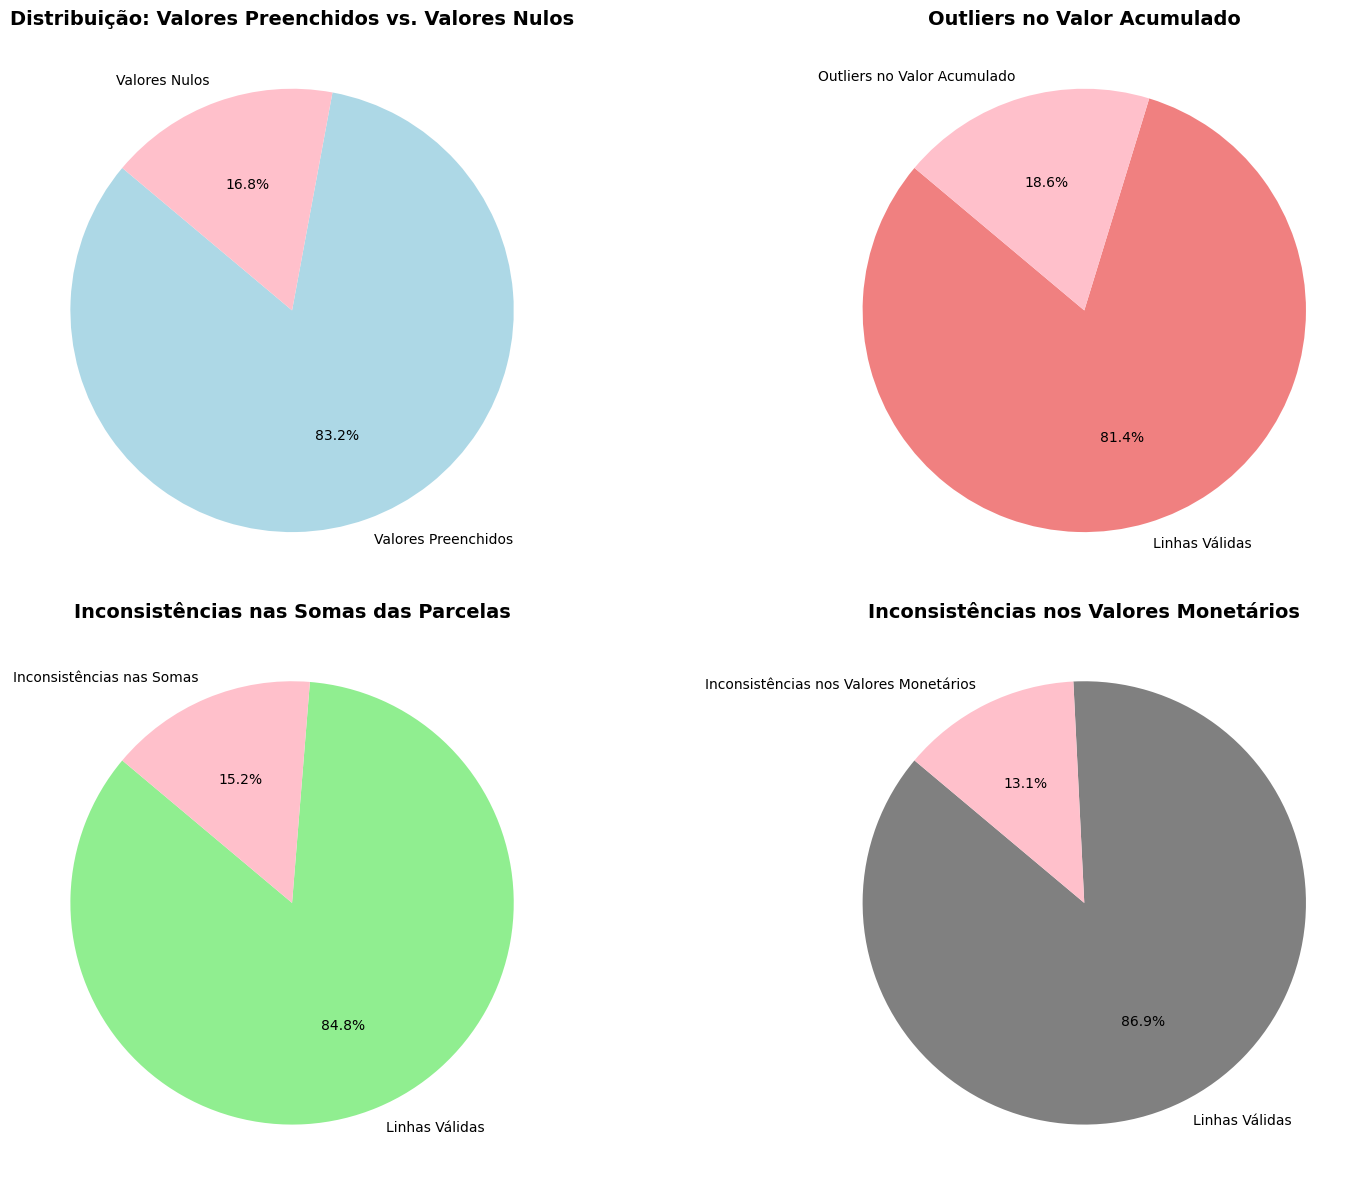

In [84]:
# Resultados da Análise Qualitativa

# Foi realizada uma análise qualitativa para verificar os seguintes pontos na base de dados:
    # - Presença de valores nulos;
    # - Tipos de dados nas colunas;
    # - Linhas duplicadas;
    # - Outliers no campo 'valor_acumulado';
    # - Valores inválidos em 'num_parcelas';
    # - Inconsistências nas somas das parcelas;
    # - Inconsistências nos valores monetários.

# Presença de Valores Nulos
    # No banco de dados, cerca de 16,8% tem espaços nulos, sendo eles, conforme tabela abaixo.
    # Colunas com valores nulos:
        # - subtipo: 143 nulos.
        # - prorrogavel: 12 nulos.
        # - justificativa_inativo: 145 nulos.
        # - subcategoria: 145 nulos.
        # - unidades_requisitantes: 65 nulos.
        # - informacao_complementar: 108 nulos.
        # - sistema_origem_licitacao: 145 nulos.
        # - data_publicacao: 16 nulos.
        # - data_proposta_comercial: 74 nulos.

# Tipos de Dados
    # Os tipos de dados foram verificados e estão conforme esperado. As colunas monetárias e de contagem estão no formato numérico, enquanto textos e datas estão como objetos ou strings.

# Linhas Duplicadas
    # Nenhuma linha duplicada foi encontrada.

# Outliers no 'valor_acumulado'
    # Foram detectados 27 outliers no campo 'valor_acumulado'. O que corresponde a 18,6% das linhas.
    # Os IDs desses registros são:
        # [2457, 2776, 4270, 64828, 102435, 113799, 125684, 127115, 134573, 136823, 140731, 141646, 146271, 147081, 148778, 165821, 194042, 200054, 200056, 200057, 200063, 200082, 200085, 207137, 228113, 234203, 300189]

# Valores Inválidos em 'num_parcelas'
    # Nenhum valor inválido (negativo) foi encontrado na coluna 'num_parcelas'.

# **Inconsistências nas Datas de Vigência**
    # Não foram encontradas inconsistências nas datas de vigência (início posterior ao fim).

# **Inconsistências nas Somas das Parcelas**
    # Foram encontradas 22 inconsistências nas somas das parcelas. Representando um total de 15,2%.
    # Os IDs desses registros são:
        # [2447, 2457, 2776, 4270, 64828, 67502, 127115, 141646, 147081, 148778, 165821, 186205, 194042, 199415, 200054, 200056, 200057, 200063, 200082, 200085, 234357, 300189]


# **Inconsistências nos Valores Monetários**
    # Foram encontradas 19 inconsistências, o que corresponde a 13,1% dos registros com 'valor_inicial' preenchido, mas os campos 'valor_global', 'valor_acumulado' ou 'valor_parcela' estão zerados, mesmo com 'num_parcelas' maior que 0. 
        # Os IDs desses registros são:
    # [4260, 4539, 64914, 181870, 191367, 196244, 205572, 219026, 222247, 232334, 241943, 262666, 267181, 267525, 276014, 284149, 289605, 291083, 337277]

# **Conclusão**
# Os valores nulos representam dados ausentes que podem impactar as análises e devem ser tratados adequadamente. Sendo que 
# foi observado cerca de 16,8% das células vazias.
# Os Outliers foram obserrvados fora do intervalo interquartil (IQR) e podem representar anomalias.
# As inconsistências nas somas ocorrem quando o total calculado a partir de 'num_parcelas' e 'valor_parcela' não corresponde ao 'valor_global' ou 'valor_acumulado'.
    # indicando que tem algum erro presente.
# A análise qualitativa revelou a presença de valores nulos, outliers e inconsistências nas somas e nos valores monetários. 


import matplotlib.pyplot as plt


# Calcular totais para os valores nulos
total_celulas = df.size  
total_nulos = df.isnull().sum().sum()  
total_validos = total_celulas - total_nulos  

# Calcular totais de linhas
total_linhas = len(df)  # Total de linhas no DataFrame

# Totais para inconsistências nas somas das parcelas
total_inconsistencias_somas = len(inconsistencias)
linhas_validas_somas = total_linhas - total_inconsistencias_somas

# Totais para inconsistências nos valores monetários
total_inconsistencias_monetarias = len(inconsistencias_valores)
linhas_validas_monetarias = total_linhas - total_inconsistencias_monetarias

# Totais para outliers no valor acumulado
total_outliers = len(outliers)
linhas_validas_outliers = total_linhas - total_outliers


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1 - Valores nulos
labels_nulos = ['Valores Preenchidos', 'Valores Nulos']
valores_nulos = [total_validos, total_nulos]
cores_nulos = ['lightblue', 'pink']
axes[0, 0].pie(valores, labels=labels, autopct='%1.1f%%', startangle=140, colors=cores)
axes[0, 0].set_title('Distribuição: Valores Preenchidos vs. Valores Nulos', fontsize=14, fontweight='bold')

# Gráfico 2 - Outliers no valor acumulado
labels_outliers = ['Linhas Válidas', 'Outliers no Valor Acumulado']
valores_outliers = [linhas_validas_outliers, total_outliers]
cores_outliers = ['lightcoral', 'pink']
axes[0, 1].pie(valores_outliers, labels=labels_outliers, autopct='%1.1f%%', startangle=140, colors=cores_outliers)
axes[0, 1].set_title('Outliers no Valor Acumulado', fontsize=14, fontweight='bold')


# Gráfico 3 - Inconsistências nas somas das parcelas
labels_somas = ['Linhas Válidas', 'Inconsistências nas Somas']
valores_somas = [linhas_validas_somas, total_inconsistencias_somas]
cores_somas = ['lightgreen', 'pink']
axes[1, 0].pie(valores_somas, labels=labels_somas, autopct='%1.1f%%', startangle=140, colors=cores_somas)
axes[1, 0].set_title('Inconsistências nas Somas das Parcelas', fontsize=14, fontweight='bold')

# Gráfico 4 - Inconsistências nos valores monetários
labels_monetarios = ['Linhas Válidas', 'Inconsistências nos Valores Monetários']
valores_monetarios = [linhas_validas_monetarias, total_inconsistencias_monetarias]
cores_monetarios = ['grey', 'pink']
axes[1, 1].pie(valores_monetarios, labels=labels_monetarios, autopct='%1.1f%%', startangle=140, colors=cores_monetarios)
axes[1, 1].set_title('Inconsistências nos Valores Monetários', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

